In [2]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [20]:
baseDir = "./save/server2Models/rnn/rnn1/"
predsVT = torch.load(baseDir+"validation_preds", map_location="cpu")
targetsVT = torch.load(baseDir+"validation_targets", map_location="cpu")
inputsVT = torch.load(baseDir+"validation_datas", map_location="cpu")
predsTT = torch.load(baseDir+"train_preds", map_location="cpu")
targetsTT = torch.load(baseDir+"train_targets", map_location="cpu")
inputsTT = torch.load(baseDir+"train_datas", map_location="cpu")

# meansVT = torch.load(baseDir+"validation_means", map_location="cpu")
# stdsVT = torch.load(baseDir+"validation_stds", map_location="cpu")
# targetsVT = torch.load(baseDir+"validation_targets", map_location="cpu")
# inputsVT = torch.load(baseDir+"validation_datas", map_location="cpu")
# meansTT = torch.load(baseDir+"train_means", map_location="cpu")
# stdsTT = torch.load(baseDir+"train_stds", map_location="cpu")
# targetsTT = torch.load(baseDir+"train_targets", map_location="cpu")
# inputsTT = torch.load(baseDir+"train_datas", map_location="cpu")

In [21]:
predsT = np.concatenate(predsTT, axis=1)
targetsT = np.concatenate(targetsTT, axis=1)
datasT = np.concatenate(inputsTT, axis=1)

predsV = np.concatenate(predsVT, axis=1)
targetsV = np.concatenate(targetsVT, axis=1)
datasV = np.concatenate(inputsVT, axis=1)

# meansT = np.concatenate([p for p in meansTT], axis=1)
# stdsT = np.concatenate([p for p in stdsTT], axis=1)
# targetsT = np.concatenate([t for t in targetsTT], axis=1)
# datasT = np.concatenate([d for d in inputsTT], axis=1)

# meansV = np.concatenate([p for p in meansVT], axis=1)
# stdsV = np.concatenate([p for p in stdsVT], axis=1)
# targetsV = np.concatenate([t for t in targetsVT], axis=1)
# datasV = np.concatenate([d for d in inputsVT], axis=1)

In [22]:
targetsV.shape

(12, 3528, 207)

In [23]:
datasV.shape

(12, 3528, 207)

In [24]:
datasT.shape

(12, 24108, 207)

In [25]:
targetsT.shape

(12, 24108, 207)

In [26]:
def plotRandomInstance(preds,targets, datas, dataset):
    instance = np.random.randint(targets.shape[1])
    sensor = np.random.randint(targets.shape[2])
    p = preds[:, instance, sensor]
    t = targets[:, instance, sensor]
    d = datas[:,instance, sensor]
    plt.plot(range(0,60, 5),p, label="Pred")
    #plt.fill_between(range(0,60, 5),m-1.96*std, m+1.96*std)
    plt.plot(range(0,60, 5),t, label="target")
    plt.plot(range(-60,0, 5), d, label="input")
    plt.legend()
    plt.xlabel("Minutes relative to prediction time")
    plt.ylabel("Speed (mph)")
    plt.title("random sensor sample {}".format(dataset))
    plt.show()

In [27]:
def plotRandomInstanceVRNN(means, stds, targets, datas, dataset):
    instance = np.random.randint(targets.shape[1])
    sensor = np.random.randint(targets.shape[2])
    m = means[:, instance, sensor]
    std = stds[:, instance, sensor]
    t = targets[:, instance, sensor]
    d = datas[:,instance, sensor]
    print(m)
    print(t)
    print(d)
    plt.plot(range(0,60, 5),m, label="Pred")
    #plt.fill_between(range(0,60, 5),m-1.96*std, m+1.96*std)
    plt.plot(range(0,60, 5),t, label="target")
    plt.plot(range(-60,0, 5), d, label="input")
    plt.legend()
    plt.xlabel("Minutes relative to prediction time")
    plt.ylabel("Speed (mph)")
    plt.title("random sensor sample {}".format(dataset))
    plt.show()

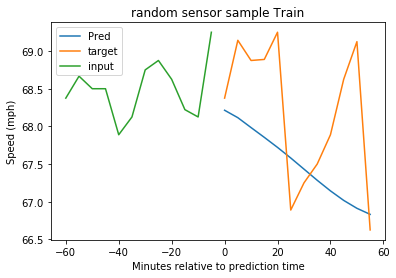

In [56]:
plotRandomInstance(predsT, targetsT, datasT, "Train")

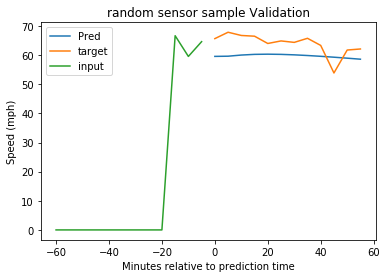

In [52]:
plotRandomInstance(predsV, targetsV, datasV, "Validation")